In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('credit_scoring_sample.csv')

In [3]:
data.shape

(45063, 8)

In [4]:
data.head()

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,0,64,0,0.249908,0,0,8158.0,0.0
1,0,58,0,3870.000000,0,0,NaN,0.0
2,0,41,0,0.456127,0,0,6666.0,0.0
3,0,43,0,0.000190,0,0,10500.0,2.0
4,1,49,0,0.271820,0,0,400.0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45063 entries, 0 to 45062
Data columns (total 8 columns):
SeriousDlqin2yrs                        45063 non-null int64
age                                     45063 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    45063 non-null int64
DebtRatio                               45063 non-null float64
NumberOfTimes90DaysLate                 45063 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    45063 non-null int64
MonthlyIncome                           36420 non-null float64
NumberOfDependents                      43946 non-null float64
dtypes: float64(3), int64(5)
memory usage: 2.8 MB


In [6]:
data.describe()

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
count,45063.000000,45063.000000,45063.000000,45063.000000,45063.000000,45063.000000,3.642000e+04,43946.000000
mean,0.222489,51.210949,0.750993,352.062688,0.570712,0.505870,6.452263e+03,0.789628
std,0.415922,14.651533,6.184521,2467.556358,6.173106,6.153609,1.263817e+04,1.130813
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,40.000000,0.000000,0.176373,0.000000,0.000000,3.286000e+03,0.000000
50%,0.000000,51.000000,0.000000,0.373949,0.000000,0.000000,5.166000e+03,0.000000
75%,0.000000,62.000000,0.000000,0.857027,0.000000,0.000000,8.000000e+03,1.000000
max,1.000000,107.000000,98.000000,326442.000000,98.000000,98.000000,1.794060e+06,10.000000


In [7]:
data2 = data.dropna(axis = 0, subset=['MonthlyIncome'])

In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36420 entries, 0 to 45062
Data columns (total 8 columns):
SeriousDlqin2yrs                        36420 non-null int64
age                                     36420 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    36420 non-null int64
DebtRatio                               36420 non-null float64
NumberOfTimes90DaysLate                 36420 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    36420 non-null int64
MonthlyIncome                           36420 non-null float64
NumberOfDependents                      36420 non-null float64
dtypes: float64(3), int64(5)
memory usage: 2.5 MB


In [9]:
data2.describe()

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
count,36420.000000,36420.000000,36420.000000,36420.000000,36420.000000,36420.000000,3.642000e+04,36420.000000
mean,0.229462,50.298270,0.649478,28.624407,0.448545,0.385585,6.452263e+03,0.883608
std,0.420493,14.267377,5.134173,446.594563,5.113121,5.088125,1.263817e+04,1.160570
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,40.000000,0.000000,0.145980,0.000000,0.000000,3.286000e+03,0.000000
50%,0.000000,50.000000,0.000000,0.304183,0.000000,0.000000,5.166000e+03,0.000000
75%,0.000000,60.000000,0.000000,0.501672,0.000000,0.000000,8.000000e+03,2.000000
max,1.000000,103.000000,98.000000,49112.000000,98.000000,98.000000,1.794060e+06,10.000000


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
data_std = scaler.fit_transform(data2)

In [13]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

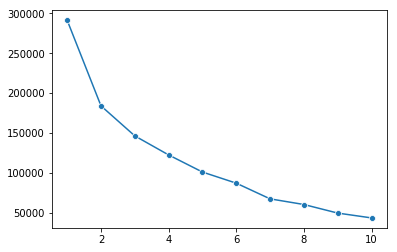

In [14]:
cluster = list(range(1,11))
inert = []
for i in cluster:
    kmeans = KMeans( n_clusters = i ).fit(data_std)
    inert.append( kmeans.inertia_ )
else:
    sns.lineplot(x = cluster, y = inert, marker='o')

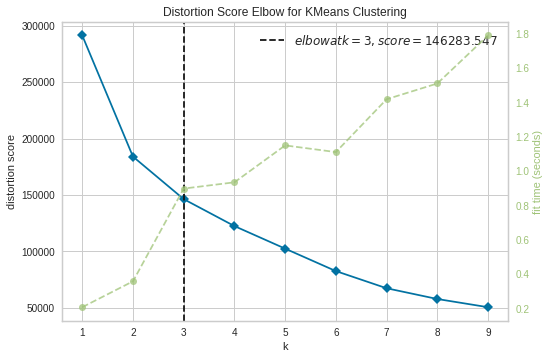

In [15]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(data_std)        # Fit the data to the visualizer
visualizer.show()   

In [41]:
labels = KMeans(3, random_state=42).fit_predict(data_std)

In [46]:
len(labels)

36420

In [47]:
data2['labels'] = labels

/home/rob/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36420 entries, 0 to 45062
Data columns (total 9 columns):
SeriousDlqin2yrs                        36420 non-null int64
age                                     36420 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    36420 non-null int64
DebtRatio                               36420 non-null float64
NumberOfTimes90DaysLate                 36420 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    36420 non-null int64
MonthlyIncome                           36420 non-null float64
NumberOfDependents                      36420 non-null float64
labels                                  36420 non-null int32
dtypes: float64(3), int32(1), int64(5)
memory usage: 2.6 MB


In [49]:
data2.head()

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents,labels
0,0,64,0,0.249908,0,0,8158.0,0.0,0
2,0,41,0,0.456127,0,0,6666.0,0.0,0
3,0,43,0,0.000190,0,0,10500.0,2.0,0
4,1,49,0,0.271820,0,0,400.0,0.0,2
5,0,55,0,0.324678,0,0,8934.0,0.0,0


In [65]:
data_new

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents,labels
count,3.642000e+04,3.642000e+04,3.642000e+04,3.642000e+04,3.642000e+04,3.642000e+04,3.642000e+04,3.642000e+04,36420.000000
mean,8.740339e-17,5.930944e-17,-2.809395e-17,-1.755872e-18,5.462712e-18,1.248620e-17,3.667821e-17,2.731356e-18,0.457002
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,0.838142
min,-5.457053e-01,-2.053543e+00,-1.265028e-01,-6.409572e-02,-8.772546e-02,-7.578236e-02,-5.105449e-01,-7.613670e-01,0.000000
25%,-5.457053e-01,-7.218153e-01,-1.265028e-01,-6.376884e-02,-8.772546e-02,-7.578236e-02,-2.505353e-01,-7.613670e-01,0.000000
50%,-5.457053e-01,-2.090603e-02,-1.265028e-01,-6.341459e-02,-8.772546e-02,-7.578236e-02,-1.017775e-01,-7.613670e-01,0.000000
75%,-5.457053e-01,6.800033e-01,-1.265028e-01,-6.297238e-02,-8.772546e-02,-7.578236e-02,1.224669e-01,9.619472e-01,0.000000
max,1.832491e+00,3.693913e+00,1.896154e+01,1.099074e+02,1.907891e+01,1.918501e+01,1.414471e+02,7.855204e+00,2.000000


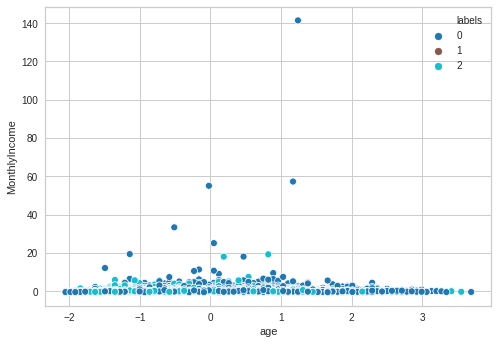

In [70]:
sns.scatterplot(x = data_new.age, y = data_new.MonthlyIncome, hue=data_new.labels, palette='tab10');

In [71]:
data_new = data2.drop(columns='labels')

In [21]:
pca = PCA(2, random_state=42)

In [22]:
data_pca = pca.fit_transform(data_std)

In [81]:
data_pca.shape

(36420, 2)

In [83]:
labels

array([0, 0, 0, ..., 2, 0, 2], dtype=int32)

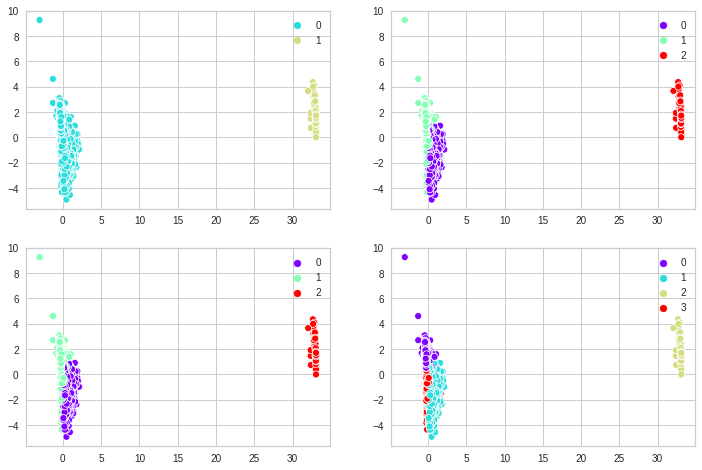

In [23]:
fig, axis = plt.subplots(nrows=2,ncols=2, figsize=(12,8))
cluster = list(range(2,6))
for i in range(2):
    for j in range(2):
        labels = KMeans( n_clusters = cluster[i+j] ).fit_predict(data_std)
        data_pca = pca.fit_transform(data_std)
        sns.scatterplot(x= data_pca[:,0], y = data_pca[:,1], hue=labels, palette='rainbow', ax=axis[i][j]) 

In [24]:
from sklearn.cluster import DBSCAN

In [25]:
np.unique(labels)

array([0, 1, 2, 3], dtype=int32)

In [ ]:
fig, axis = plt.subplots(nrows=2,ncols=2, figsize=(12,8))
for i in range(2):
    for j in range(2):
        labels = DBSCAN(n_jobs=2, eps=1).fit_predict(data_std)
        #data_pca = pca.fit_transform(data_std)
        sns.scatterplot(x= data_pca[:,0], y = data_pca[:,1], hue=labels, palette='rainbow', ax=axis[i][j]) 